In [2]:
import eda
import pandas as pd
import librosa
from eda import *

In [3]:
df = pd.read_csv('instruments.csv')
df.set_index('fname',inplace=True,drop=False)

In [4]:
for f in df.index:
    rate,signal = eda.wavfile.read('wavfiles/'+f)
    df.at[f,'length']= signal.shape[0]/rate

In [4]:
classes = list (np.unique(df.label))
class_dist = df.groupby(['label'])['length'].mean()

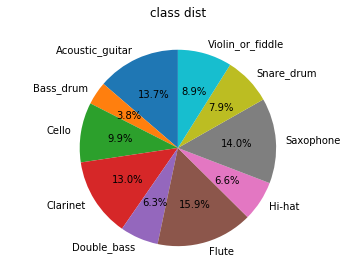

In [5]:
fig, ax = plt.subplots()
ax.set_title('class dist',y=1.08)
ax.pie(class_dist,labels=class_dist.index,autopct='%1.1f%%',shadow=False
      ,startangle=90)
ax.axis('equal')
plt.show()


In [6]:
def envelope(y,rate,threshold):
    mask = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window = int(rate/10),min_periods=1,center=True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [7]:
def calc_fft(y,rate):
    n = len(y)
    freq = np.fft.rfftfreq(n, d=1/rate)
    Y = abs(np.fft.rfft(y)/n)
    return Y,freq

In [8]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [9]:
def calc_spec(y,rate):
    spec=[]
    y_chunks = list(chunks(y,int(len(y)/100)))
    for y in y_chunks:
        fft_res = calc_fft(y,rate)[0]
        if len(spec)>2:
            if len(fft_res) == len(spec[-1]):
                spec.append(list(fft_res))
        else:
            spec.append(list(fft_res))

    
    return np.array(spec)

In [ ]:
len(spec[-4])

In [ ]:
spec['Acoustic_guitar'][4:5].shape

In [ ]:
spec['Acoustic_guitar'][4:5]

In [ ]:
type(Sp)

In [10]:
signals={}
fft = {}
fbank = {}
mfccs = {}
specs = {}

In [42]:
for c in classes:
    wav_file = df[df.label == c].iloc[0,0]
    signal,rate = librosa.load(r'wavfiles/'+wav_file,sr=44100)
    mask = envelope(signal,rate,0.0005)
    # signal = signal [[False,False,True...]]
    signal = signal[mask]
    signals[c] = signal
    fft[c] = calc_fft(signal,rate)
    bank = logfbank(signal[:rate],rate,nfilt=26,nfft=1103).T
    fbank[c] = bank
    mel = mfcc(signal[:rate],rate,numcep=13,nfilt=26,nfft=1103).T
    mfccs[c] = mel
    s = calc_spec(signal,rate)
    specs[c] =s[:]


In [28]:
def plot_spec(mfccs):
    fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False,
                             sharey=True, figsize=(80,20))
    fig.suptitle('Mel Frequency Cepstrum Coefficients', size=16)
    i = 0
    for x in range(3):
        for y in range(2):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1


Acoustic_guitar


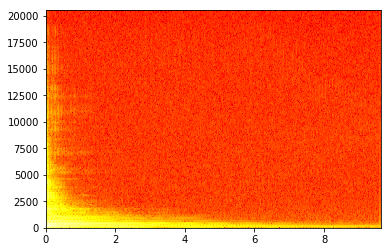

Bass_drum


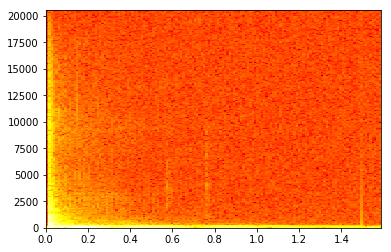

Cello


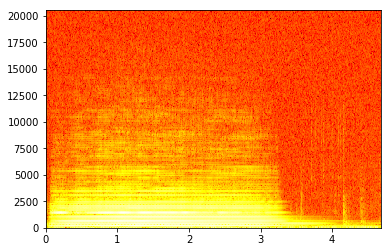

Clarinet


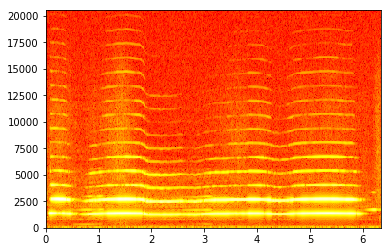

Double_bass


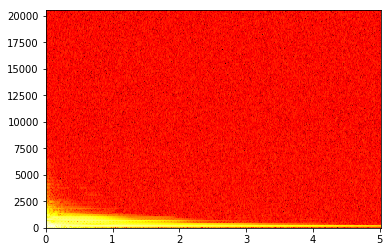

Flute


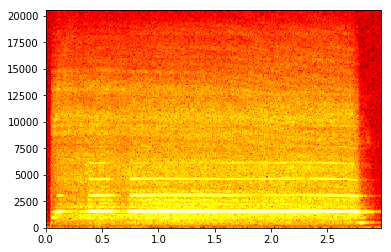

Hi-hat


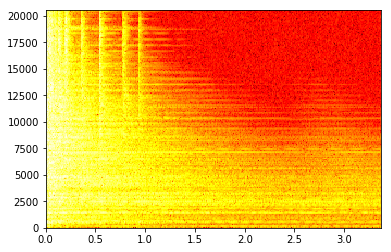

Saxophone


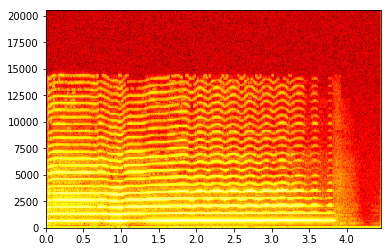

Snare_drum


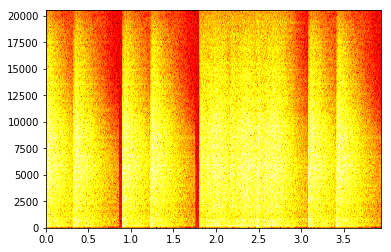

Violin_or_fiddle


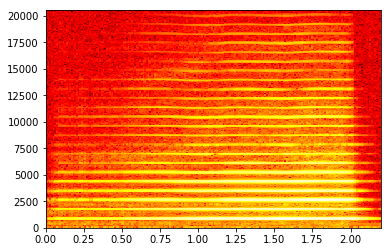

In [58]:
for signal in signals:
    Pxx, freqs, bins, im = plt.specgram(signals[signal],NFFT=512, Fs=41000, noverlap=64,cmap='hot')
    print (signal)
    plt.show()

In [71]:
mfccs['Violin_or_fiddle'].shape

(13, 99)

Acoustic_guitar


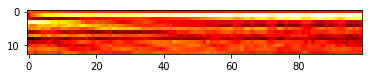

Bass_drum


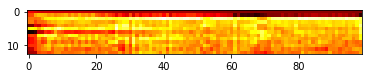

Cello


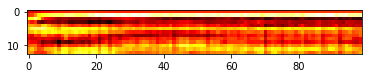

Clarinet


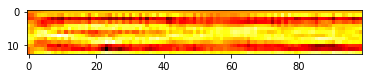

Double_bass


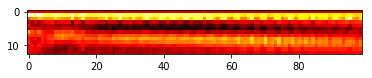

Flute


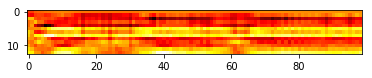

Hi-hat


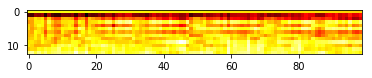

Saxophone


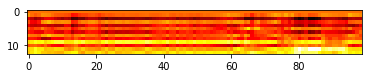

Snare_drum


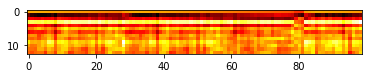

Violin_or_fiddle


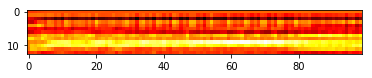

In [78]:
for tool in mfccs:
    plt.imshow(mfccs[tool], cmap='hot',interpolation='nearest')
    print (tool)
    plt.show()

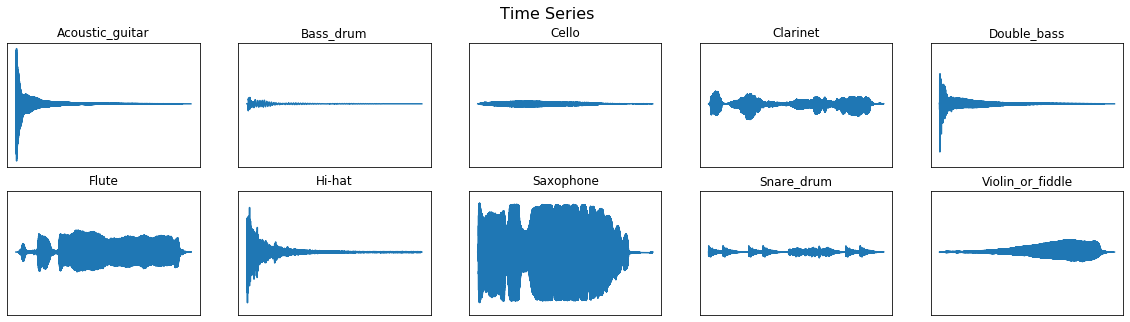

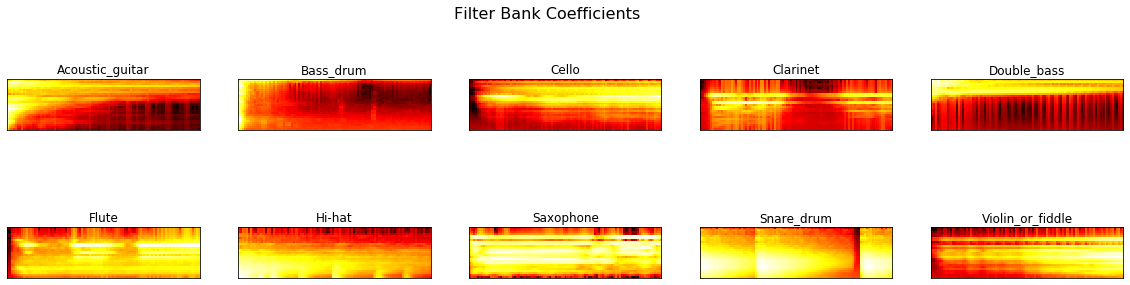

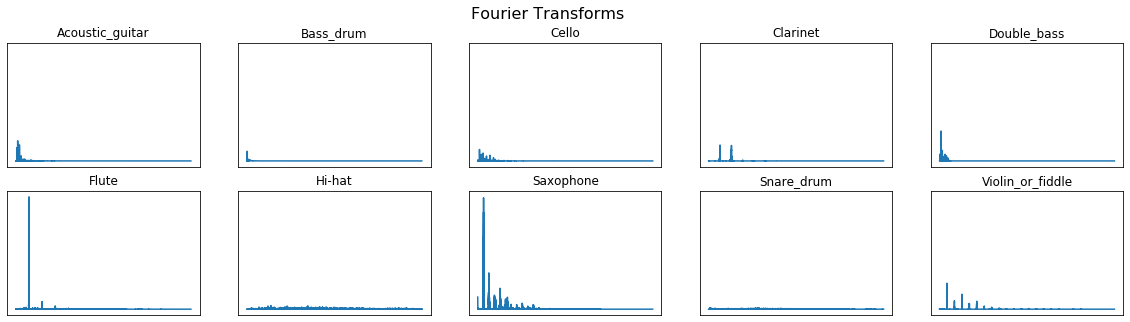

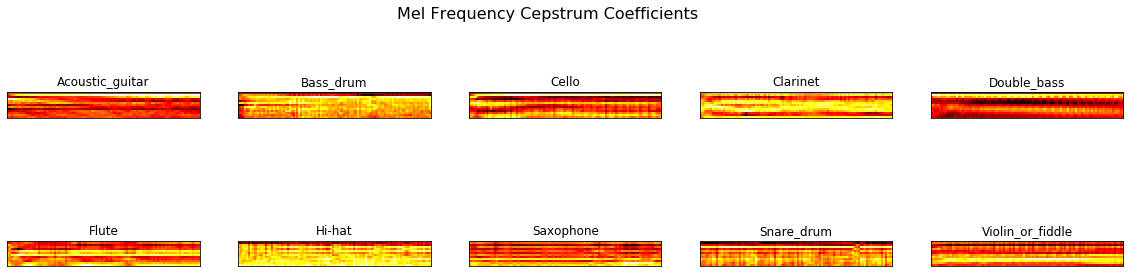

In [67]:
plot_signals(signals)
plt.show
plot_fbank(fbank)
plt.show
plot_fft(fft)
plt.show()
plot_mfccs(mfccs)
plt.show()


In [ ]:
if len (os.listdir('clean'))==0:
        for f in tqdm(df.fname):
            signal,rate = librosa.load(r'wavfiles/'+f,sr=16000)
            mask = envelope(signal,rate,0.0005)
            wavfile.write(filename=r'clean/'+f,rate=rate,data=signal[mask])